In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as pl

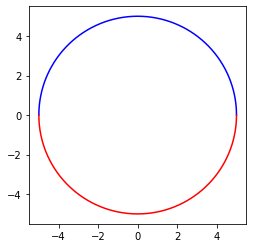

In [3]:
def Slide_5_a ():
    
    r = 5

    def f1 (x):
        return np.sqrt (r ** 2 - x ** 2)

    def f2 (x):
        return - f1 (x)

    xx = np.linspace (-r, r, 1000)
    yy1 = f1 (xx)
    yy2 = f2 (xx)
    pl.plot (xx, yy1, 'blue')
    pl.plot (xx, yy2, 'red')
    pl.axis ('scaled')

Slide_5_a()

In [4]:
def Circle (t):
        r = 5
        x = r * np.cos (t)
        y = r * np.sin (t)
        return np.array ([x, y])

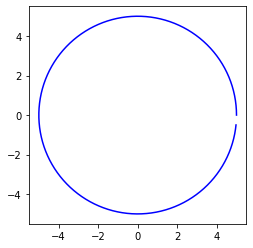

In [5]:
def Slide_5_b ():

    tt = np.linspace (0, 2 * np.pi - 0.1, 1000)
    cc = Circle (tt)
    pl.plot (cc [0], cc [1], 'blue')
    pl.axis ('scaled')

Slide_5_b()

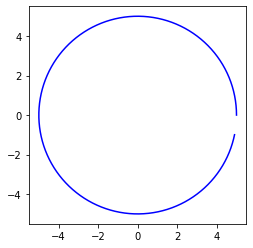

In [6]:
def Slide_6_a ():

    def c (t):
        return Circle (2 * t)

    tt = np.linspace (0, np.pi - 0.1, 1000)
    cc = c (tt)
    pl.plot (cc [0], cc [1], 'blue')
    pl.axis ('scaled')

Slide_6_a()

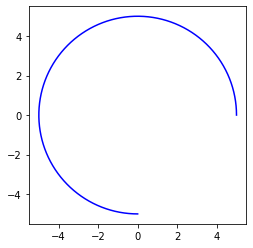

In [7]:
def Slide_6_b ():
    
    def c (t):
        return Circle (2 * np.pi * t)

    tt = np.linspace (0, 0.75, 1000)
    cc = c (tt)
    pl.plot (cc [0], cc [1], 'blue')
    pl.axis ('scaled')

Slide_6_b()

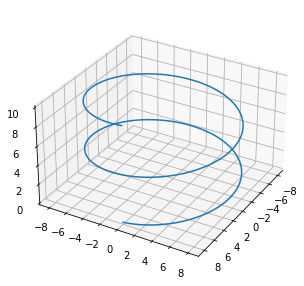

In [8]:
def Slide_8 ():

    r = 8
    h = 5

    def c (t):
        x = r * np.cos (t)
        y = r * np.sin (t)
        z = h * t / (2 * np.pi)
        return np.array ([x, y, z])
    
    tt = np.linspace (0, 4 * np.pi, 1000)
    cc = c (tt)
    fig = pl.figure (figsize = (5, 5))
    ax = fig.add_subplot (projection = '3d')
    ax.set_box_aspect ((np.ptp (cc [0]), np.ptp (cc [1]), np.ptp (cc [2])))
    ax.plot (cc [0], cc [1], cc [2])
    ax.view_init (30, 30)

Slide_8()

In [9]:
def InterPoly (p):
    x = p [0] .reshape (-1, 1)
    y = p [1] .reshape (-1, 1)
    n = len (x)
    k = np.arange (n)
    A = x ** k
    c = np.linalg.inv (A) @ y
    return c

In [10]:
def Example1 ():
    return np.array ([
        [0, 1, 2, 3],
        [1, 1, 0, 1]
    ])

In [11]:
def Slide_15 ():

    f = InterPoly (Example1())
    print (f)

Slide_15()

[[ 1. ]
 [ 1.5]
 [-2. ]
 [ 0.5]]


In [12]:
def EvalPoly (c, x):
    n = len (c)
    k = np.arange (n)
    return x ** k @ c

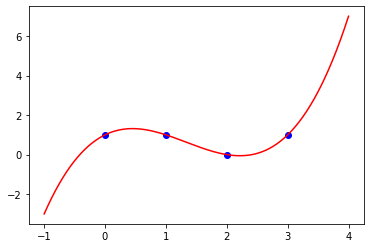

In [13]:
def Slide_16_a ():

    p = Example1()
    c = InterPoly (p)
    xx = np.linspace (np.min (p [0]) - 1, np.max (p [0]) + 1, 1000) .reshape (-1, 1)
    yy = EvalPoly (c, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_16_a()

In [14]:
def Example2 (n):
    x = np.arange (n)
    y = np.zeros (n)
    y [n >> 1] = 1
    return np.array ([x, y])

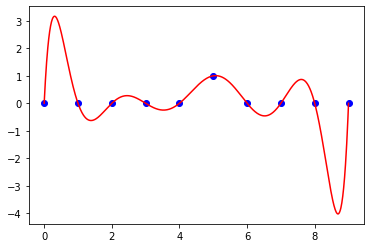

In [15]:
def Slide_16_b ():
    p = Example2 (10)
    c = InterPoly (p)
    xx = np.linspace (np.min (p [0]), np.max (p [0]), 1000) .reshape (-1, 1)
    yy = EvalPoly (c, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_16_b()

In [16]:
def LagrangePoly (i, x, xx):
    n = len (x)
    yy = 1
    for k in range (n):
        if i != k:
            yy *= (xx - x [k]) / (x [i] - x [k])
    return yy

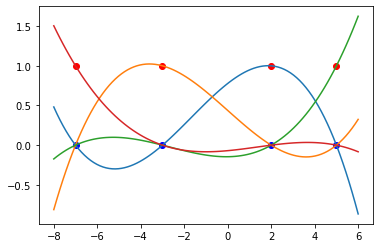

In [17]:
def Slide_18_a ():
    x = np.array ([2, -3, 5, -7])
    n = len (x)
    y0 = np.zeros (n)
    y1 = y0 + 1
    pl.plot (x, y0, 'o', color = 'blue')
    pl.plot (x, y1, 'o', color = 'red')
    xx = np.linspace (np.min (x) - 1, np.max (x) + 1, 100)
    for i in range (n):
        yy = LagrangePoly (i, x, xx)
        pl.plot (xx, yy)

Slide_18_a()

In [18]:
def LagrangeInterPoly (p, xx):
    x = p [0]
    y = p [1]
    n = len (x)
    yy = np.zeros_like (xx)
    for i in range (n):
        yy += y [i] * LagrangePoly (i, x, xx)
    return yy

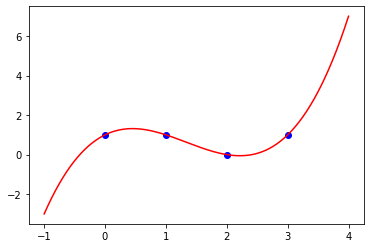

In [19]:
def Slide_18_b ():

    p = Example1()
    xx = np.linspace (np.min (p [0]) - 1, np.max (p [0]) + 1, 1000)
    yy = LagrangeInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_18_b()

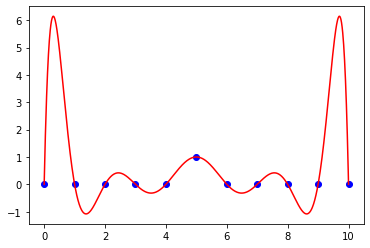

In [20]:
def Slide_18_c ():

    p = Example2 (11)
    xx = np.linspace (np.min (p [0]), np.max (p [0]), 1000)
    yy = LagrangeInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_18_c()

In [21]:
def NewtonInterPoly (p, xx):

    n = p.shape [1]
    x = p [0]
    y = np.zeros ((n, n))
    y [:, 0] = np.array (p [1]) .T

    for k in range (1, n):
        for i in range (n - k):
            y [i, k] = (y [i + 1, k - 1] - y [i, k - 1]) / (x [i + k] - x [i])

    pp = xx - xx + 1
    yy = xx - xx + y [0, 0]
    for i in range (1, n):
        pp *= xx - x [i - 1]
        yy += y [0, i] * pp
    return yy

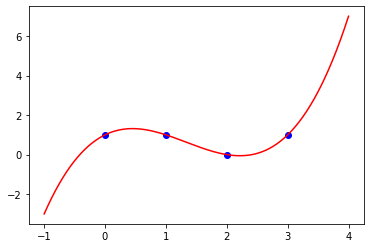

In [22]:
def Slide_19_a ():
    p = Example1()
    xx = np.linspace (np.min (p [0]) - 1, np.max (p [0]) + 1, 1000)
    yy = NewtonInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_19_a()

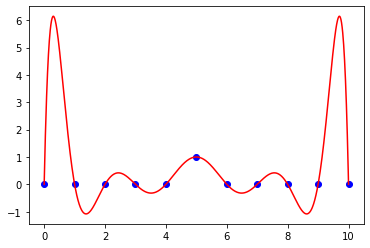

In [23]:
def Slide_19_b ():
    p = Example2 (11)
    xx = np.linspace (np.min (p [0]), np.max (p [0]), 1000)
    yy = NewtonInterPoly (p, xx)
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (xx, yy, 'red')

Slide_19_b()

In [24]:
def DeCasteljau0 (p, t):
    n = p.shape [1]
    if n > 1:
        q = (1 - t) * p [:, :-1] + t * p [:, 1:]
        return DeCasteljau0 (q, t)
    return p [:, 0]

def DeCasteljau (p, tt):
    pp = np.array ([DeCasteljau0 (p, t) for t in tt])
    return pp.T

In [25]:
def Example3 ():
    return np.array ([
        [-1, 0, 1],
        [-1, 1, 0]
    ])

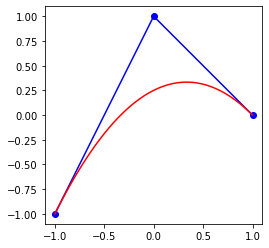

In [26]:
def Slide_23 ():
    p = Example3()
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (p [0], p [1], color = 'blue')
    tt = np.linspace (0, 1, 100)
    qq = DeCasteljau (p, tt)
    pl.plot (qq [0], qq [1], 'red')
    pl.axis ('scaled')

Slide_23()

In [27]:
def Example4 ():
    return np.array ([
        [-2, -1, 2, 3],
        [-2,  1, 2, -1]
    ])

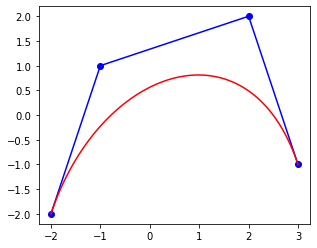

In [28]:
def Slide_24 ():
    p = Example4()
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (p [0], p [1], color = 'blue')
    tt = np.linspace (0, 1, 100)
    qq = DeCasteljau (p, tt)
    pl.plot (qq [0], qq [1], 'red')
    pl.axis ('scaled')

Slide_24()

In [29]:
def Binom (n, k):
    j = np.arange (1, n - k + 1)
    f = 1 + k / j
    return np.prod (f)

In [30]:
def BinomTest (n):
    for i in range (n + 1):
        a = []
        for k in range (i + 1):
            a.append (Binom (i, k))
        print (a)

BinomTest (5)

[1.0]
[1.0, 1.0]
[1.0, 2.0, 1.0]
[1.0, 3.0, 3.0, 1.0]
[1.0, 4.0, 6.0, 4.0, 1.0]
[1.0, 5.0, 10.0, 10.0, 5.0, 1.0]


In [31]:
def Bernstein (n, k, tt):
    f1 = Binom (n, k)
    f2 = np.power (1 - tt, n - k);
    f3 = np.power (tt, k)
    return f1 * f2 * f3

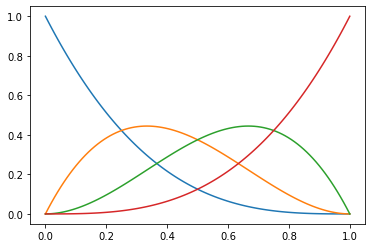

In [32]:
def Slide_25 ():
    n = 3
    xx = np.linspace (0, 1, 100)
    for k in range (n + 1):
        yy = Bernstein (n, k, xx)
        pl.plot (xx, yy)

Slide_25()

In [33]:
def Bezier (p, tt):
    n = p.shape [1] - 1
    cc = np.zeros ((p.shape [0], tt.shape [0]))
    for i in range (n + 1):
        b = Bernstein (n, i, tt) .reshape (1, -1)
        q = p [:, i] .reshape (-1, 1)
        cc += q @ b
    return cc;

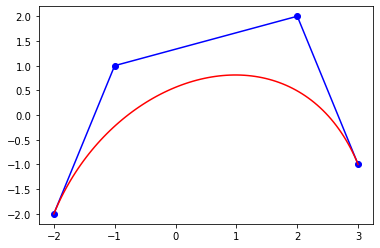

In [34]:
def Slide_27 ():
    p = Example4()
    tt = np.linspace (0, 1, 100)
    cc = Bezier (p, tt)
    pl.plot (p [0], p [1], 'blue')
    pl.plot (p [0], p [1], 'o', color = 'blue')
    pl.plot (cc [0], cc [1], 'red')

Slide_27()

In [35]:
def Example5 ():
    return np.array ([
        [-2, 1,  1, 2],
        [-1, 1, -1, 1]
    ])

In [36]:
def Example6 ():
    return np.array ([
        [-1, 2, -2,  1],
        [-1, 1,  1, -1]
    ])

In [37]:
def Example7 ():
    return np.array ([
        [-1, -1, 1,  1],
        [-1,  1, 1, -1]
    ])

In [38]:
def Example8 ():
    return np.array ([
        [0, 1, 2, 0],
        [0, 0, 0, 1]
    ])

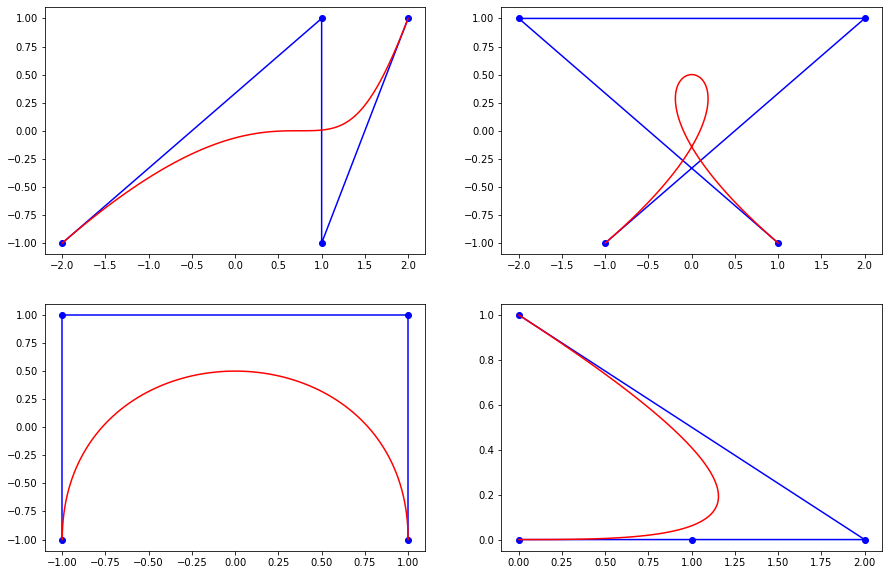

In [39]:
def Slide_29 ():
    pl.figure (figsize = (15, 10))
    ex = [Example5, Example6, Example7, Example8]
    for i in range (4):
        pl.subplot (2, 2, i + 1)
        p = ex [i] ()
        tt = np.linspace (0, 1, 100)
        cc = Bezier (p, tt)
        pl.plot (p [0], p [1], 'blue')
        pl.plot (p [0], p [1], 'o', color = 'blue')
        pl.plot (cc [0], cc [1], 'red')

Slide_29()